## Create and test ion channel model

In [1]:
from experiments.ical_markov import (dias_iv,
                                     rao_inact,
                                     rao_rec,
                                     rao_taui)

In [2]:
from ionchannelABC.experiment import setup
from ionchannelABC import plot_sim_results

In [3]:
modelfile = 'models/ical_markov.mmt'
#modelfile = 'models/Korhonen2009_iCaL.mmt'

In [4]:
observations, model, summary_statistics = setup(modelfile,
                                                dias_iv,
                                                rao_inact,
                                                rao_rec,
                                                rao_taui)

In [5]:
assert(len(observations)==len(summary_statistics(model({}))))

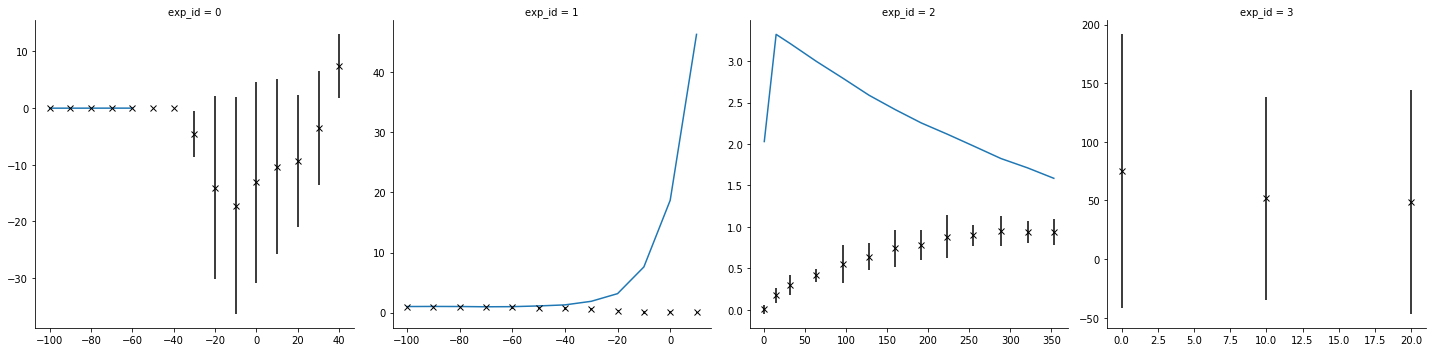

In [6]:
g = plot_sim_results(modelfile, dias_iv, rao_inact, rao_rec, rao_taui)

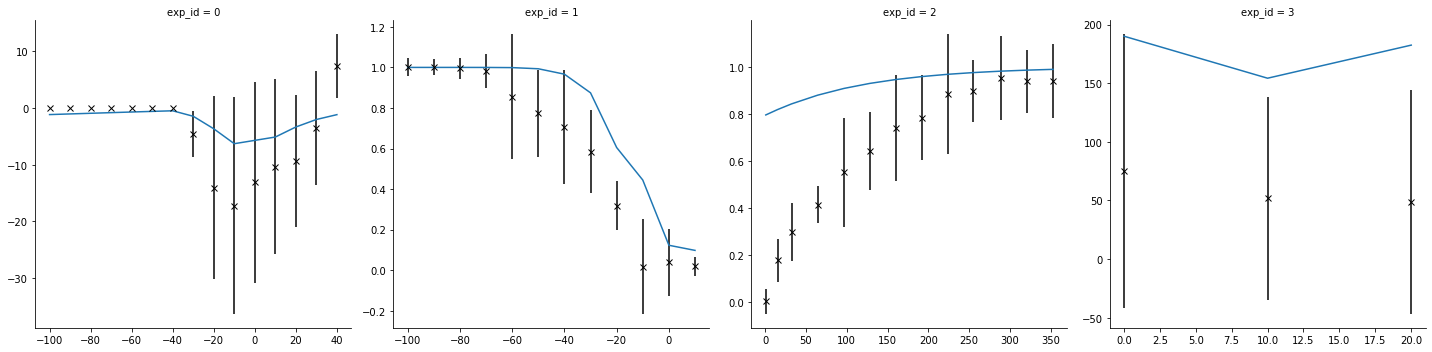

In [7]:
g = plot_sim_results('models/Korhonen2009_iCaL.mmt', dias_iv, rao_inact, rao_rec, rao_taui)

## Set limits and generate uniform initial priors

In [8]:
from pyabc import Distribution, RV
limits = {'ical.g_CaL': (0., 5.),
          'ical.E_CaL': (0., 50.),
          'log_ical.p_1': (-7., 3.),
          'ical.p_2': (1e-7, 0.4),
          'log_ical.p_3': (-7., 3.),
          'ical.p_4': (1e-7, 0.4),
          'log_ical.p_5': (-7., 3.),
          'ical.p_6': (1e-7, 0.4),
          'log_ical.p_7': (-7., 3.),
          'ical.p_8': (1e-7, 0.4)}
prior = Distribution(**{key: RV("uniform", a, b - a)
                        for key, (a,b) in limits.items()})

## Run ABC calibration

In [9]:
import os, tempfile
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "hl1_ical.db"))

In [10]:
# Let's log all the sh!t
import logging
logging.basicConfig()
abc_logger = logging.getLogger('ABC')
abc_logger.setLevel(logging.DEBUG)
eps_logger = logging.getLogger('Epsilon')
eps_logger.setLevel(logging.DEBUG)

In [11]:
from pyabc.populationstrategy import AdaptivePopulationSize, ConstantPopulationSize
from ionchannelABC import theoretical_population_size
pop_size = theoretical_population_size(2, len(limits))
print("Theoretical minimum population size is {} particles".format(pop_size))

Theoretical minimum population size is 1024 particles


In [16]:
from pyabc import ABCSMC
from pyabc.epsilon import MedianEpsilon
from pyabc.sampler import MulticoreEvalParallelSampler, SingleCoreSampler
from ionchannelABC import IonChannelDistance, EfficientMultivariateNormalTransition, IonChannelAcceptor

abc = ABCSMC(models=model,
             parameter_priors=prior,
             distance_function=IonChannelDistance(
                 exp_id=list(observations.exp_id),
                 variance=list(observations.variance),
                 delta=0.2),
             population_size=ConstantPopulationSize(2000),
             summary_statistics=summary_statistics,
             transitions=EfficientMultivariateNormalTransition(),
             eps=MedianEpsilon(initial_epsilon=20),
             sampler=MulticoreEvalParallelSampler(n_procs=8),
             acceptor=IonChannelAcceptor())

DEBUG:ABC:ion channel weights: {'0': 1.0635316012875435, '1': 1.0635316012875435, '2': 1.0635316012875435, '3': 1.0635316012875435, '4': 1.0635316012875435, '5': 1.0635316012875435, '6': 1.0635316012875435, '7': 0.8977489933674502, '8': 0.22620447076975095, '9': 0.19151978525172253, '10': 0.20667602725006035, '11': 0.2374212213864331, '12': 0.3122605194321565, '13': 0.36364516187035917, '14': 0.6529083588126907, '15': 1.3294145016094294, '16': 1.3294145016094294, '17': 1.3294145016094294, '18': 1.3294145016094294, '19': 0.864563430976293, '20': 1.233475899035547, '21': 0.9439382914259616, '22': 1.3028766000635623, '23': 1.3294145016094294, '24': 1.1420924839997204, '25': 1.3294145016094294, '26': 1.3294145016094294, '27': 1.2271518476394734, '28': 1.2271518476394734, '29': 1.2271518476394734, '30': 1.2271518476394734, '31': 1.0098334733162506, '32': 1.2271518476394734, '33': 1.0399777561018084, '34': 1.2271518476394734, '35': 0.9168224955108066, '36': 1.2271518476394734, '37': 1.227151

In [17]:
obs = observations.to_dict()['y']
obs = {str(k): v for k, v in obs.items()}

In [18]:
abc_id = abc.new(db_path, obs)

In [ ]:
history = abc.run(minimum_epsilon=0., max_nr_populations=200, min_acceptance_rate=0.005)

INFO:ABC:t:0 eps:20
DEBUG:ABC:now submitting population 0
DEBUG:ABC:population 0 done
DEBUG:ABC:
total nr simulations up to t =0 is 52792
DEBUG:Epsilon:new eps, t=1, eps=3.89997648122919
INFO:ABC:t:1 eps:3.89997648122919
DEBUG:ABC:now submitting population 1


In [31]:
from pyabc import ABCSMC
from pyabc.epsilon import MedianEpsilon
from pyabc.sampler import MulticoreEvalParallelSampler, SingleCoreSampler
from ionchannelABC import IonChannelDistance, EfficientMultivariateNormalTransition, IonChannelAcceptor

abc_continued = ABCSMC(models=model,
             parameter_priors=prior,
             distance_function=IonChannelDistance(
                 exp_id=list(observations.exp_id),
                 variance=list(observations.variance),
                 delta=0.05),
             population_size=ConstantPopulationSize(2000),
             summary_statistics=summary_statistics,
             transitions=EfficientMultivariateNormalTransition(),
             eps=MedianEpsilon(),
             sampler=MulticoreEvalParallelSampler(n_procs=8),
             acceptor=IonChannelAcceptor())

DEBUG:ABC:ion channel weights: {'0': 1.1878337357944198, '1': 1.1878337357944198, '2': 1.1878337357944198, '3': 1.1878337357944198, '4': 1.1878337357944198, '5': 1.1878337357944198, '6': 1.1878337357944198, '7': 0.2506687481844334, '8': 0.06316062946379418, '9': 0.05347599961267908, '10': 0.057707913251092556, '11': 0.06629256150332123, '12': 0.08718912980328117, '13': 0.10153670812534, '14': 0.18230454413413333, '15': 5.9391686789720985, '16': 5.9391686789720985, '17': 5.9391686789720985, '18': 1.4847921697430246, '19': 1.4847921697430246, '20': 1.4350611987248847, '21': 0.8906596191547972, '22': 0.2414027022809066, '23': 0.3444101433821999, '24': 0.2635656866487306, '25': 0.36378815101945744, '26': 0.6150345086971786, '27': 0.3188941401105891, '28': 0.45313563815940516, '29': 1.4847921697430246, '30': 1.215973571160607, '31': 0.7205769310581348, '32': 0.5258264091505312, '33': 0.8106490474404014, '34': 0.28196488606622694, '35': 0.3970525946646864, '36': 0.29038174833686003, '37': 0.

In [32]:
abc_continued.load(db_path, 1)

1

In [17]:
history = abc_continued.run(minimum_epsilon=0., max_nr_populations=200, min_acceptance_rate=0.0001)

NameError: name 'abc_continued' is not defined

# Results analysis

In [41]:
from pyabc import History

In [42]:
db_path = 'sqlite:////storage/hhecm/cellrotor/chouston/abc-hl1-results/ical/7/hl1_ical.db'
history = History(db_path)
history.all_runs()

[<ABCSMC(id=1, start_time=2019-09-13 09:36:23.146226, end_time=2019-09-16 02:28:51.310293)>,
 <ABCSMC(id=2, start_time=2019-09-16 08:46:28.964154, end_time=None)>,
 <ABCSMC(id=3, start_time=2019-09-16 17:19:35.639827, end_time=None)>,
 <ABCSMC(id=4, start_time=2019-09-16 18:28:22.446250, end_time=2019-09-17 02:41:51.966211)>,
 <ABCSMC(id=5, start_time=2019-09-17 08:59:21.594577, end_time=2019-09-17 16:46:11.409075)>]

In [43]:
history.id = 5

In [44]:
df, w = history.get_distribution(m=0)

In [45]:
df.describe()

name,ical.E_CaL,ical.g_CaL,ical.p_2,ical.p_4,ical.p_6,ical.p_8,log_ical.p_1,log_ical.p_3,log_ical.p_5,log_ical.p_7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,29.102247,0.736184,0.070423,0.217868,0.050528,0.033479,2.318886,-0.562595,-1.888829,-3.356328
std,0.399477,0.022998,0.046438,0.047613,0.000567,0.000512,0.411565,0.448502,0.004309,0.016510
min,27.649139,0.657544,0.000179,0.059102,0.048789,0.031742,0.904767,-2.148594,-1.905183,-3.413241
25%,28.838798,0.720544,0.035726,0.190472,0.050159,0.033150,2.047988,-0.867889,-1.891770,-3.367500
50%,29.096371,0.735468,0.062172,0.224467,0.050511,0.033472,2.368493,-0.510950,-1.888820,-3.356458
75%,29.368213,0.751681,0.096468,0.253200,0.050912,0.033826,2.641146,-0.232665,-1.885951,-3.345524
max,30.375098,0.809323,0.242383,0.333099,0.052694,0.035130,2.998806,0.583248,-1.872501,-3.301065


/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/scra

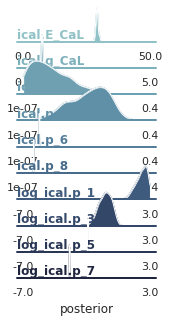

In [25]:
from ionchannelABC import plot_parameters_kde
g = plot_parameters_kde(df, w, limits)#, aspect=12,height=0.6)

### Generating paper plots

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

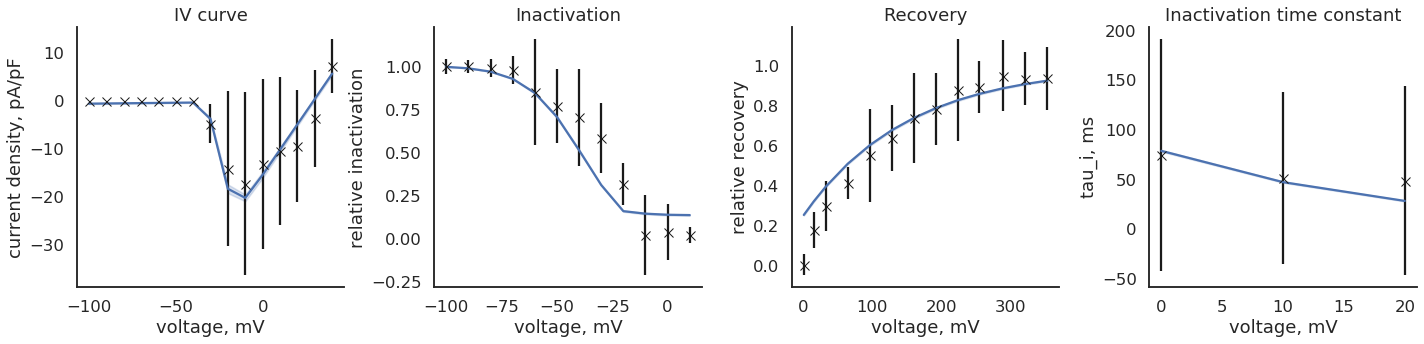

In [47]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(modelfile, dias_iv, rao_inact, rao_rec, rao_taui, df=df, w=w)

xlabels = ["voltage, mV"]*4
ylabels = ["current density, pA/pF", "relative inactivation", "relative recovery", "tau_i, ms"]
titles = ["IV curve", "Inactivation", "Recovery", "Inactivation time constant"]
for ax, xl in zip(g.axes.flatten(), xlabels):
    ax.set_xlabel(xl)
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax, t in zip(g.axes.flatten(), titles):
    ax.set_title(t)
    
plt.tight_layout()

In [48]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-hl1-results/ical/calibrated.pdf')

In [49]:
from ionchannelABC.visualization import plot_experiment_traces

In [50]:
def split_iv(data):
    out = []
    for d in data.split_periodic(5450, adjust=True):
        d = d.trim(5150, 5450, adjust=True)
        out.append(d)
    return out
def split_inact(data):
    out = []
    for d in data.split_periodic(6400, adjust=True):
        d = d.trim(5950, 6400, adjust=True)
        out.append(d)
    return out

In [51]:
import data.ical.data_ical as data
times_rec, _, _ = data.Rec_Rao()
split_times = [10800+tw for tw in times_rec]
for i, time in enumerate(split_times[:-1]):
    split_times[i+1] += split_times[i]
    
def split_rec(data):
    out = []
    for i, time in enumerate(split_times):
        d_, data = data.split(time)
        out.append(
            d_.trim(d_['engine.time'][0]+10000,
                    d_['engine.time'][0]+10800+times_rec[i],
                    adjust=True)
        )
    return out

In [52]:
def split_taui(data):
    out = []
    for d in data.split_periodic(5100, adjust=True):
        d = d.trim(4950, 5100, adjust=True)
        out.append(d)
    return out

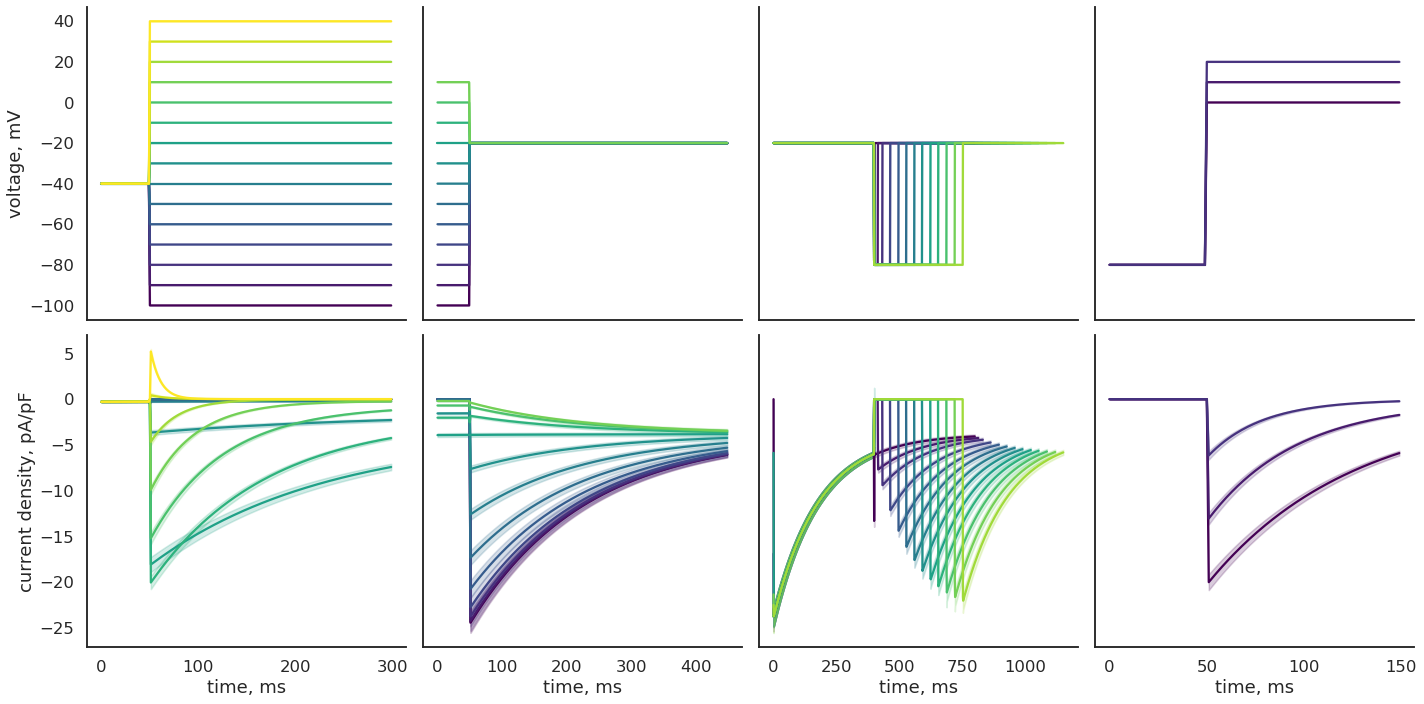

In [53]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_experiment_traces(modelfile, 'ical.i_CaL', [split_iv, split_inact, split_rec, split_taui],
                           dias_iv, rao_inact, rao_rec, rao_taui, df=df, w=w, log_interval=1, n_samples=100)

xlabel = "time, ms"
ylabels = ["voltage, mV", "current density, pA/pF"]
for ax in g.axes[1,:]:
    ax.set_xlabel(xlabel)
for ax, yl in zip(g.axes, ylabels):
    ax[0].set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title('')
    
plt.tight_layout()

In [54]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-hl1-results/ical/protocol.pdf')

### Legacy code below

In [21]:
# Generate parameter samples
n_samples = 100
df, w = history.get_distribution(m=0)
th_samples = df.sample(n=n_samples, weights=w, replace=True).to_dict(orient='records')

In [22]:
# Generate sim results samples
import pandas as pd
samples = pd.DataFrame({})
for i, th in enumerate(th_samples):
    results = summary_statistics(model(th))
    output = pd.DataFrame({'x': observations.x, 'y': list(results.values()),
                           'exp_id': observations.exp_id})
    #output = model.sample(pars=th, n_x=50)
    output['sample'] = i
    output['distribution'] = 'post'
    samples = samples.append(output, ignore_index=True)

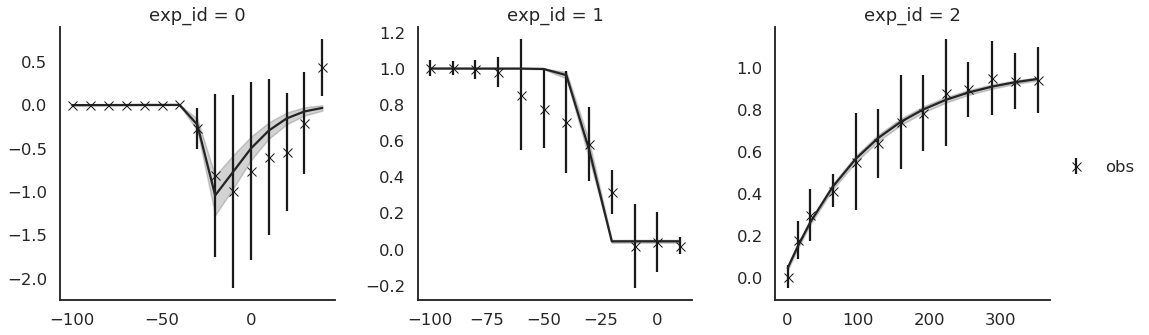

In [23]:
from ionchannelABC import plot_sim_results
import seaborn as sns
sns.set_context('talk')
g = plot_sim_results(samples, obs=observations)

# Set axis labels
#xlabels = ["voltage, mV", "voltage, mV", "voltage, mV", "time, ms"]#, "time, ms","voltage, mV"]
#ylabels = ["normalised current density, pA/pF", "activation", "inactivation", "recovery"]#, "normalised current","current density, pA/pF"]
#for ax, xl in zip(g.axes.flatten(), xlabels):
#    ax.set_xlabel(xl)
#for ax, yl in zip(g.axes.flatten(), ylabels):
#    ax.set_ylabel(yl)

In [31]:
#g.savefig('results/icat-generic/icat_sim_results.pdf')

In [103]:
def plot_sim_results_all(samples: pd.DataFrame):
    with sns.color_palette("gray"):
        grid = sns.relplot(x='x', y='y',
                           col='exp',
                           units='sample',
                           kind='line',
                           data=samples,
                           estimator=None, lw=0.5,
                           alpha=0.5,
                           #estimator=np.median,
                           facet_kws={'sharex': 'col',
                                      'sharey': 'col'})
    return grid

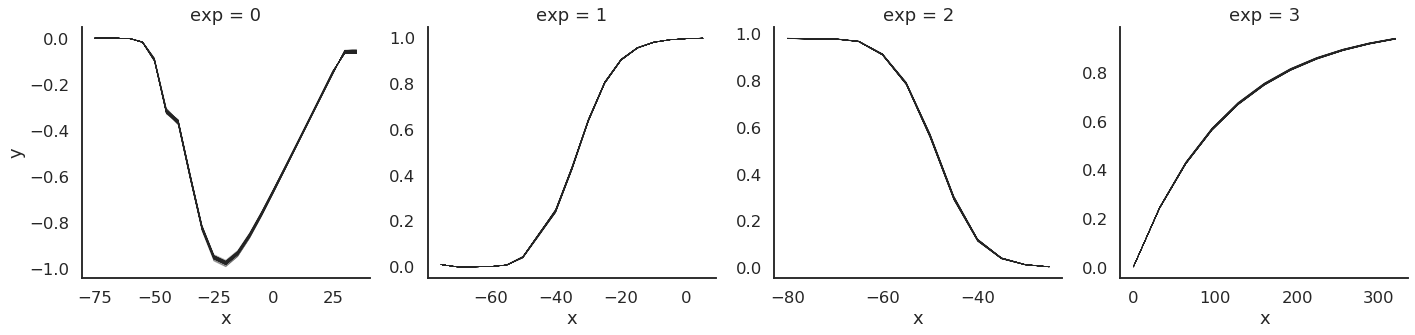

In [104]:
grid2 = plot_sim_results_all(samples)

In [33]:
#grid2.savefig('results/icat-generic/icat_sim_results_all.pdf')

In [35]:
import numpy as np

In [42]:
# Mean current density
print(np.mean(samples[samples.exp=='0'].groupby('sample').min()['y']))
# Std current density
print(np.std(samples[samples.exp=='0'].groupby('sample').min()['y']))

-0.9792263129382246
0.060452038127623814


In [43]:
import scipy.stats as st
peak_current = samples[samples['exp']=='0'].groupby('sample').min()['y'].tolist()
rv = st.rv_discrete(values=(peak_current, [1/len(peak_current),]*len(peak_current)))

In [44]:
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: -0.9929750589235674
95% CI: (-1.0714884415582595, -0.8489199437971181)


In [45]:
# Voltage of peak current density
idxs = samples[samples.exp=='0'].groupby('sample').idxmin()['y']
print("mean: {}".format(np.mean(samples.iloc[idxs]['x'])))
print("STD: {}".format(np.std(samples.iloc[idxs]['x'])))

mean: -20.1
STD: 0.7


In [46]:
voltage_peak = samples.iloc[idxs]['x'].tolist()
rv = st.rv_discrete(values=(voltage_peak, [1/len(voltage_peak),]*len(voltage_peak)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: -20.0
95% CI: (-20.0, -20.0)


In [48]:
# Half activation potential
# Fit of activation to Boltzmann equation
from scipy.optimize import curve_fit
grouped = samples[samples['exp']=='1'].groupby('sample')
def fit_boltzmann(group):
    def boltzmann(V, Vhalf, K):
        return 1/(1+np.exp((Vhalf-V)/K))
    guess = (-30, 10)
    popt, _ = curve_fit(boltzmann, group.x, group.y)
    return popt
output = grouped.apply(fit_boltzmann).apply(pd.Series)

In [49]:
print(np.mean(output))
print(np.std(output))

0   -33.399071
1     5.739255
dtype: float64
0    0.823473
1    0.366996
dtype: float64


In [50]:
Vhalf = output[0].tolist()
rv = st.rv_discrete(values=(Vhalf, [1/len(Vhalf),]*len(Vhalf)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: -33.407394098238164
95% CI: (-34.93130871417603, -31.973122716861205)


In [51]:
slope = output[1].tolist()
rv = st.rv_discrete(values=(slope, [1/len(slope),]*len(slope)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: 5.728938366573993
95% CI: (5.117385157850234, 6.485585591389819)


In [52]:
# Half activation potential
grouped = samples[samples['exp']=='2'].groupby('sample')
def fit_boltzmann(group):
    def boltzmann(V, Vhalf, K):
        return 1-1/(1+np.exp((Vhalf-V)/K))
    guess = (-100, 10)
    popt, _ = curve_fit(boltzmann, group.x, group.y,
                        bounds=([-100, 1], [0, 30]))
    return popt
output = grouped.apply(fit_boltzmann).apply(pd.Series)

In [53]:
print(np.mean(output))
print(np.std(output))

0   -49.011222
1     4.399126
dtype: float64
0    0.613833
1    0.306758
dtype: float64


In [54]:
Vhalf = output[0].tolist()
rv = st.rv_discrete(values=(Vhalf, [1/len(Vhalf),]*len(Vhalf)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: -49.01404281457659
95% CI: (-50.06478757419054, -47.57952101705519)


In [55]:
slope = output[1].tolist()
rv = st.rv_discrete(values=(slope, [1/len(slope),]*len(slope)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: 4.420440009120772
95% CI: (3.7821747606540193, 4.959106709731536)


In [56]:
# Recovery time constant
grouped = samples[samples.exp=='3'].groupby('sample')
def fit_single_exp(group):
    def single_exp(t, I_max, tau):
        return I_max*(1-np.exp(-t/tau))
    guess = (1, 50)
    popt, _ = curve_fit(single_exp, group.x, group.y, guess)
    return popt[1]
output = grouped.apply(fit_single_exp)

In [57]:
print(np.mean(output))
print(np.std(output))

114.50830523453935
5.781251582667316


In [58]:
tau = output.tolist()
rv = st.rv_discrete(values=(tau, [1/len(tau),]*len(tau)))
print("median: {}".format(rv.median()))
print("95% CI: {}".format(rv.interval(0.95)))

median: 113.75533911706513
95% CI: (104.11137902797657, 125.98102619971708)
